In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy


In [11]:
dataset = pd.read_csv('../../Phase1/DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

x_inp = x_train;
y_inp = y_train;

DATA_SIZE = 500000;

decision_tree_w = 10;
random_forest_w = 10;
knn_w = 10;
xg_boost_w = 10;

total_w = decision_tree_w + random_forest_w + knn_w + xg_boost_w;

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

def genDataSet (size):
    s = int(size);
    rand_rad = randomSample(13, 15, s)
    rand_height = randomSample(13, 15, s)
    rand_freq = randomSample(1, 5, s)

    rand_x = []
    for i in range(0, s):
        rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])
    return rand_x
    
    


In [15]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (decision_tree_w/total_w))

numpy.append(x_inp, x_gen)
numpy.append(y_inp, DTReg.predict(x_gen))


array([-0.9589167 , -7.9456982 , -2.70533406, ..., -3.02043646,
       -2.43725096, -0.44526092])

In [16]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (knn_w/total_w))

numpy.append(x_inp, x_gen)
numpy.append(y_inp, knn.predict(x_gen))


array([ -0.9589167 ,  -7.9456982 ,  -2.70533406, ..., -14.23755754,
        -4.00958121,  -0.57052387])

In [18]:
# Random Forest


from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RFreg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (random_forest_w/total_w))

numpy.append(x_inp, x_gen)
numpy.append(y_inp, RFreg.predict(x_gen))


array([ -0.9589167 ,  -7.9456982 ,  -2.70533406, ...,  -2.72740076,
        -3.4717915 , -13.92225837])

In [20]:
# XG Boost


import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=100, objective='reg:linear', seed = 123)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (xg_boost_w/total_w))

numpy.append(x_inp, x_gen)
numpy.append(y_inp, xgb_reg.predict(numpy.array(x_gen)))

[10:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.9589167 , -7.9456982 , -2.70533406, ..., -0.39059225,
       -2.67831111, -9.17865276])

In [21]:
# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))

In [22]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_inp, y_inp, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
4139/4139 [==============================] - 3s 605us/step - loss: 18.2215 - accuracy: 0.0000e+00 - val_loss: 15.0525 - val_accuracy: 0.0000e+00
Epoch 2/100
4139/4139 [==============================] - 3s 666us/step - loss: 14.9552 - accuracy: 0.0000e+00 - val_loss: 14.6309 - val_accuracy: 0.0000e+00
Epoch 3/100
4139/4139 [==============================] - 3s 604us/step - loss: 14.2047 - accuracy: 0.0000e+00 - val_loss: 13.6658 - val_accuracy: 0.0000e+00
Epoch 4/100
4139/4139 [==============================] - 2s 603us/step - loss: 12.8044 - accuracy: 0.0000e+00 - val_loss: 11.5373 - val_accuracy: 0.0000e+00
Epoch 5/100
4139/4139 [==============================] - 3s 619us/step - loss: 10.7793 - accuracy: 0.0000e+00 - val_loss: 10.0775 - val_accuracy: 0.0000e+00
Epoch 6/100
4139/4139 [==============================] - 3s 605us/step - loss: 9.7273 - accuracy: 0.0000e+00 - val_loss: 9.2976 - val_accuracy: 0.0000e+00
Epoch 7/100
4139/4139 [==============================] - 2s 

4139/4139 [==============================] - 2s 564us/step - loss: 2.4552 - accuracy: 0.0000e+00 - val_loss: 2.4575 - val_accuracy: 0.0000e+00
Epoch 54/100
4139/4139 [==============================] - 2s 566us/step - loss: 2.4547 - accuracy: 0.0000e+00 - val_loss: 2.2163 - val_accuracy: 0.0000e+00
Epoch 55/100
4139/4139 [==============================] - 2s 587us/step - loss: 2.4734 - accuracy: 0.0000e+00 - val_loss: 2.6086 - val_accuracy: 0.0000e+00
Epoch 56/100
4139/4139 [==============================] - 3s 606us/step - loss: 2.4312 - accuracy: 0.0000e+00 - val_loss: 2.3634 - val_accuracy: 0.0000e+00
Epoch 57/100
4139/4139 [==============================] - 3s 609us/step - loss: 2.4305 - accuracy: 0.0000e+00 - val_loss: 2.4546 - val_accuracy: 0.0000e+00
Epoch 58/100
4139/4139 [==============================] - 2s 599us/step - loss: 2.4256 - accuracy: 0.0000e+00 - val_loss: 2.6896 - val_accuracy: 0.0000e+00
Epoch 59/100
4139/4139 [==============================] - 3s 614us/step - los

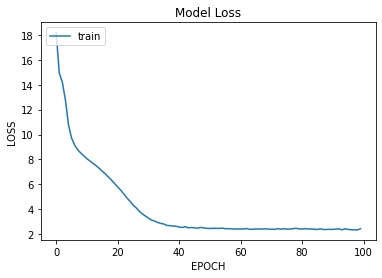

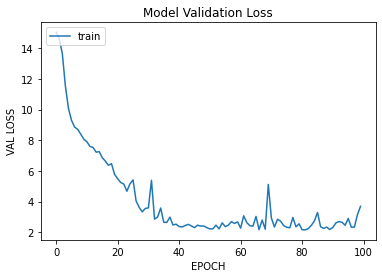

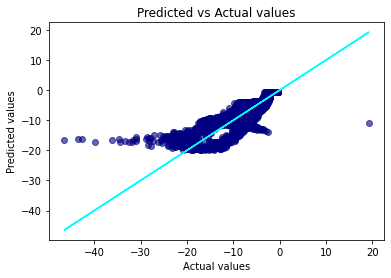

In [23]:
# Prediction

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)
mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)